In [9]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Options for display
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.4f}'.format
sns.set_style("whitegrid")
sns.set_context("paper")

%matplotlib inline

#Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression

#Train-Test Split
from sklearn.model_selection import train_test_split

#Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler

In [10]:
df = pd.read_csv("Dataset/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6000,0.6270,50,1
1,1,85,66,29,0,26.6000,0.3510,31,0
2,8,183,64,0,0,23.3000,0.6720,32,1
3,1,89,66,23,94,28.1000,0.1670,21,0
4,0,137,40,35,168,43.1000,2.2880,33,1
5,5,116,74,0,0,25.6000,0.2010,30,0
6,3,78,50,32,88,31.0000,0.2480,26,1
7,10,115,0,0,0,35.3000,0.1340,29,0
8,2,197,70,45,543,30.5000,0.1580,53,1
9,8,125,96,0,0,0.0000,0.2320,54,1


## Analyzing the data (including cleaning)df.shape

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
# replacting the 0 to NaNs cause some of the is just missing values we will replace it for a much reasonable data after wards
df_c = df.copy()
df_c[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_c[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


## showing the count of NaNs
print(df_c.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### Data impute

In [13]:
df_c['Glucose'].fillna(df_c['Glucose'].mean(), inplace = True)
df_c['BloodPressure'].fillna(df_c['BloodPressure'].mean(), inplace = True)
df_c['SkinThickness'].fillna(df_c['SkinThickness'].median(), inplace = True)
df_c['Insulin'].fillna(df_c['Insulin'].median(), inplace = True)
df_c['BMI'].fillna(df_c['BMI'].median(), inplace = True)

<AxesSubplot:>

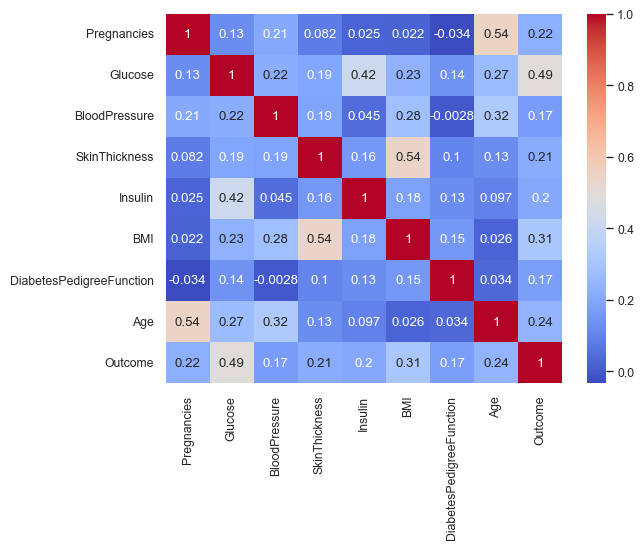

In [14]:
corrmat = df_c.corr()
sns.heatmap(corrmat,annot = True, cmap = 'coolwarm' )

## data preprocess

In [19]:
mms = MinMaxScaler()

X = df_c.drop('Outcome', axis=1)
X = mms.fit_transform(X)
X = pd.DataFrame(X)
X.rename({0:"Pregnancies",
         1:"Glucose",
         2:"BloodPressure",
         3:"SkinThickness",
         4:"Insulin",
         5:"BMI",
         6:"DiabetesPedigreeFunction",
         7:"Age"},
         inplace=True,axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.3529,0.6710,0.4898,0.3043,0.1334,0.3149,0.2344,0.4833
1,0.0588,0.2645,0.4286,0.2391,0.1334,0.1718,0.1166,0.1667
2,0.4706,0.8968,0.4082,0.2391,0.1334,0.1043,0.2536,0.1833
3,0.0588,0.2903,0.4286,0.1739,0.0962,0.2025,0.0380,0.0000
4,0.0000,0.6000,0.1633,0.3043,0.1851,0.5092,0.9436,0.2000


In [21]:
Y = df_c.Outcome # predictor

In [22]:
# perform train test split
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = 42 ,test_size = .3 , stratify = Y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((537, 8), (231, 8), (537,), (231,))

## Train the model

In [24]:
#Instantiate the Algorithm 
logreg = LogisticRegression(C=1.0, class_weight="balanced", solver='liblinear', random_state=25)

#Train/Fit the model
logreg.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', random_state=25, solver='liblinear')

In [25]:
#Check the Trained Model Coefficients
print(logreg.coef_)

[[ 1.44251009  3.84452859 -0.23355934  0.06446408  0.45296523  2.70773152
   1.02613308  0.76656979]]


In [26]:
coef = pd.DataFrame(x_train.columns, columns=["Features"])

coef['Coef'] = logreg.coef_.reshape(-1,1)

#Optional: Sort Descending (highest value first) 
coef_sorted = coef.sort_values("Coef", ascending=False)

coef_sorted.head(10)

,Features,Coef
1,Glucose,3.8445
5,BMI,2.7077
0,Pregnancies,1.4425
6,DiabetesPedigreeFunction,1.0261
7,Age,0.7666
4,Insulin,0.4530
3,SkinThickness,0.0645
2,BloodPressure,-0.2336


as we can see glucose has the highest coeffient, which is reasonable since its one of the most common causes of diabetes

In [27]:
# make prediction
y_pred = logreg.predict(x_test)

In [29]:
#Predict probabilities using the "predict_proba" function

y_prob = logreg.predict_proba(x_test)

y_prob

array([[0.58830732, 0.41169268],
       [0.5564693 , 0.4435307 ],
       [0.2157391 , 0.7842609 ],
       [0.31093509, 0.68906491],
       [0.41151157, 0.58848843],
       [0.79981455, 0.20018545],
       [0.23136069, 0.76863931],
       [0.71453041, 0.28546959],
       [0.85294722, 0.14705278],
       [0.54510491, 0.45489509],
       [0.83919758, 0.16080242],
       [0.75640879, 0.24359121],
       [0.81427417, 0.18572583],
       [0.38742724, 0.61257276],
       [0.16821922, 0.83178078],
       [0.09014498, 0.90985502],
       [0.46258525, 0.53741475],
       [0.47934876, 0.52065124],
       [0.14299474, 0.85700526],
       [0.58366797, 0.41633203],
       [0.5439331 , 0.4560669 ],
       [0.56196601, 0.43803399],
       [0.81267677, 0.18732323],
       [0.82923556, 0.17076444],
       [0.21070083, 0.78929917],
       [0.50267884, 0.49732116],
       [0.56110626, 0.43889374],
       [0.52482154, 0.47517846],
       [0.83963765, 0.16036235],
       [0.69589693, 0.30410307],
       [0.

In [31]:
y_prob_df = pd.DataFrame(y_prob, index=x_test.index)
y_prob_df.head(10)

,0,1
730,0.5883,0.4117
198,0.5565,0.4435
24,0.2157,0.7843
417,0.3109,0.6891
387,0.4115,0.5885
156,0.7998,0.2002
660,0.2314,0.7686
205,0.7145,0.2855
3,0.8529,0.1471
531,0.5451,0.4549


In [32]:
#Put all information on a DataFrame for analysis

#Copy original test data
df_results = x_test.copy()

#Add actual, predicted, and predicted probability results

df_results["Predicted_Prob_0"] = y_prob_df[0]
df_results["Predicted_Prob_1"] = y_prob_df[1]
df_results["Actual_Class"] = y_test
df_results["Predicted_Class"] = y_pred

labels = logreg.classes_

In [33]:
df_results.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Predicted_Prob_0,Predicted_Prob_1,Actual_Class,Predicted_Class
730,0.1765,0.5548,0.5510,0.1739,0.0781,0.2086,0.1046,0.2167,0.5883,0.4117,1,0
198,0.2353,0.4194,0.4082,0.4022,0.1022,0.3395,0.3531,0.0833,0.5565,0.4435,1,0
24,0.6471,0.6387,0.7143,0.2826,0.1587,0.3763,0.0751,0.5000,0.2157,0.7843,1,1
417,0.2353,0.6452,0.5918,0.2717,0.1334,0.4151,0.2032,0.2667,0.3109,0.6891,1,1
387,0.4706,0.3935,0.7755,0.3152,0.1334,0.5133,0.0687,0.4000,0.4115,0.5885,1,1
156,0.1176,0.3548,0.2857,0.0870,0.0962,0.1309,0.2387,0.0000,0.7998,0.2002,0,0
660,0.5882,0.7613,0.6122,0.2391,0.1334,0.1943,0.0444,0.5500,0.2314,0.7686,0,1
205,0.2941,0.4323,0.4898,0.2283,0.1334,0.1166,0.1405,0.1000,0.7145,0.2855,0,0
3,0.0588,0.2903,0.4286,0.1739,0.0962,0.2025,0.0380,0.0000,0.8529,0.1471,0,0
531,0.0000,0.4065,0.5306,0.2391,0.1334,0.5542,0.2596,0.0500,0.5451,0.4549,0,0


# Classification Metric

In [34]:
#Classification Metrics
from sklearn import metrics

#Get the Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=labels)

#Put in DataFrame
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

#View the DataFrame
cm_df

,0,1
0,117,33
1,22,59


Text(0.5, 25.916666666666657, 'Predicted label')

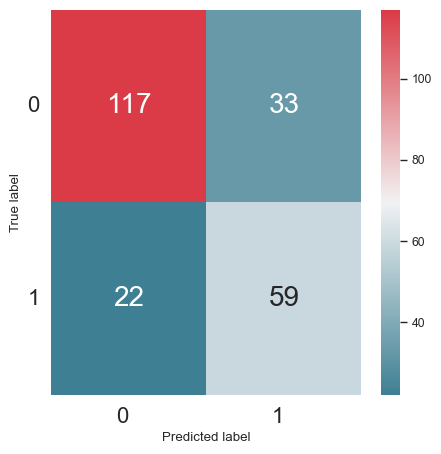

In [35]:
#Plot the confusion matrix for easier viewing

#Plot Attributes
fig = plt.figure(figsize= (5,5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap - PASS YOUR CONFUSION MATRIX DATAFRAME HERE
heatmap = sns.heatmap(cm_df,annot=True,annot_kws={"size": 20}, fmt="d", cmap=cmap)

#Heatmap attributes
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Accuracy

In [37]:
#Accuracy Rate
accuracy = metrics.accuracy_score(y_test,y_pred)

#Print accuracy 
print("Accuracy Rate: %.2f" % (accuracy * 100))

Accuracy Rate: 76.19


# Error

In [38]:
#Error Rate
error = 1 - accuracy

#Print Error
print("Error Rate: %.2f" % (error * 100))

Error Rate: 23.81


# Precision 

In [39]:
precision = metrics.precision_score(y_test,y_pred,labels=labels, average=None)

precision_df = pd.DataFrame(precision, index=labels, columns=['Precision'])

precision_df

,Precision
0,0.8417
1,0.6413


# Recall

In [40]:
recall = metrics.recall_score(y_test,y_pred,labels=labels, average=None)

recall_df = pd.DataFrame(recall, index=labels, columns=['Recall'])

recall_df

,Recall
0,0.7800
1,0.7284


## F1 Score

In [41]:
f1 = metrics.f1_score(y_test,y_pred,labels=labels, average=None)

f1_df = pd.DataFrame(f1, index=labels, columns=['F1'])

f1_df

,F1
0,0.8097
1,0.6821


## Classification Report

In [43]:
classification_report = metrics.classification_report(y_test,y_pred)

print(classification_report)

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       150
           1       0.64      0.73      0.68        81

    accuracy                           0.76       231
   macro avg       0.74      0.75      0.75       231
weighted avg       0.77      0.76      0.76       231



In [44]:
#Predict the Probabilities

predict_proba_1 = df_results["Predicted_Prob_1"]

In [45]:
#Calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_proba_1)

In [46]:
#Calculate the AUC
roc_auc = metrics.roc_auc_score(y_test,predict_proba_1)

print("AUC: %.2f" % (roc_auc))

AUC: 0.84


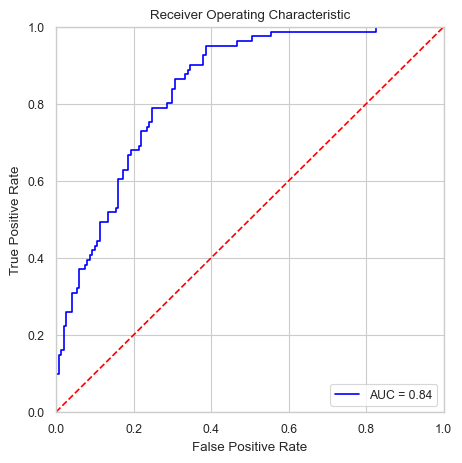

In [47]:
#Plot the AUC-ROC Curve
#Plot Attributes
fig = plt.figure(figsize= (5,5))

#Plot Title
plt.title('Receiver Operating Characteristic')

#Plot Function
plt.plot(fpr, tpr, 'b', label = 'AUC = %.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()